  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null 

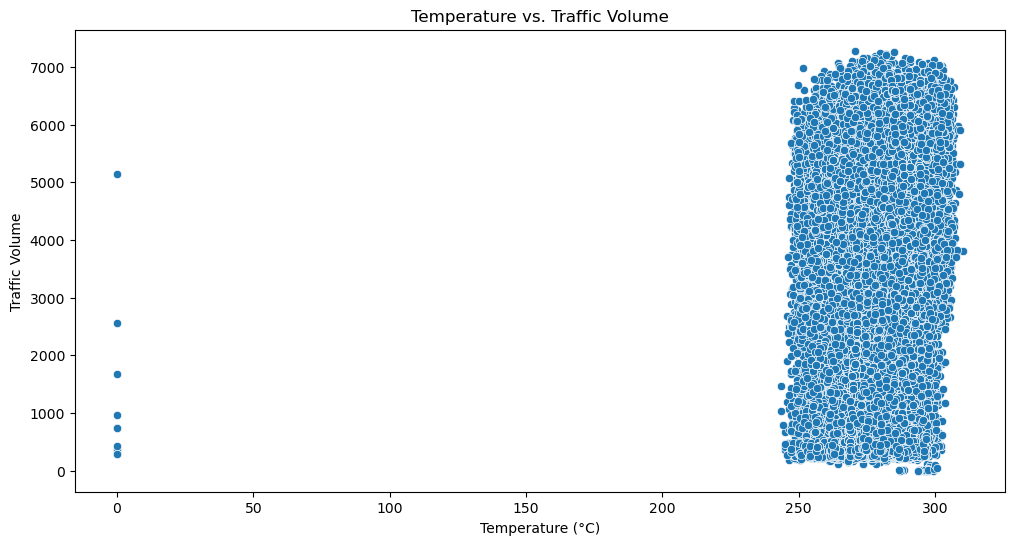

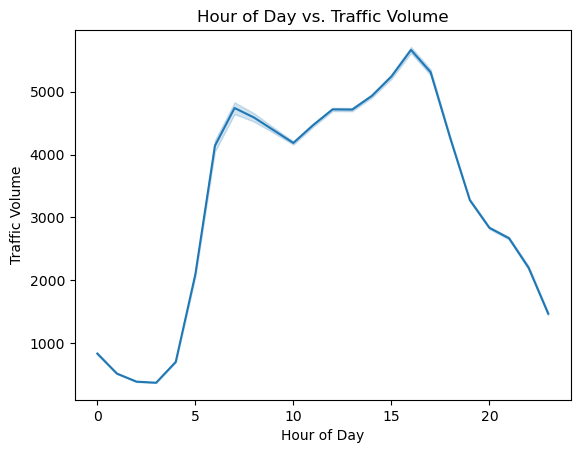

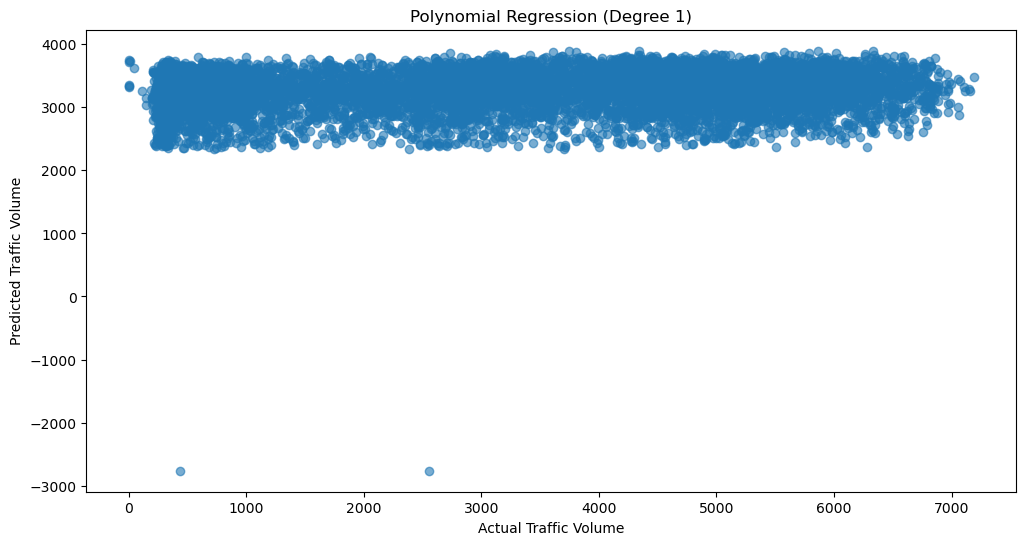

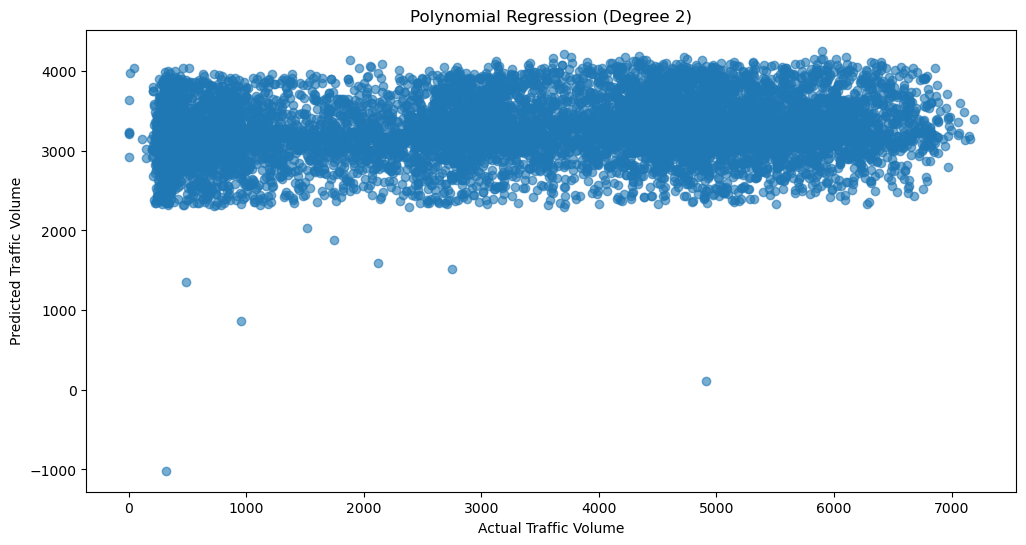

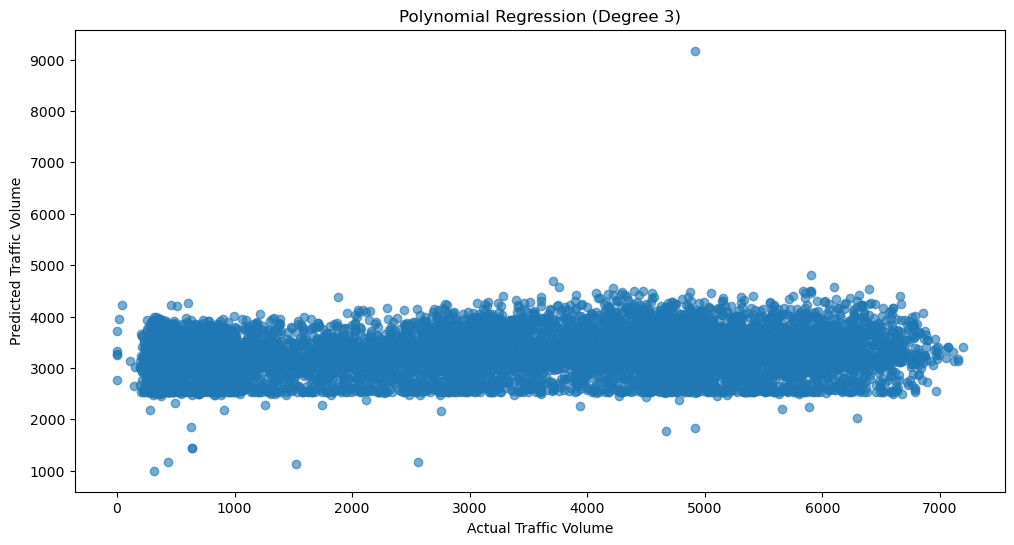

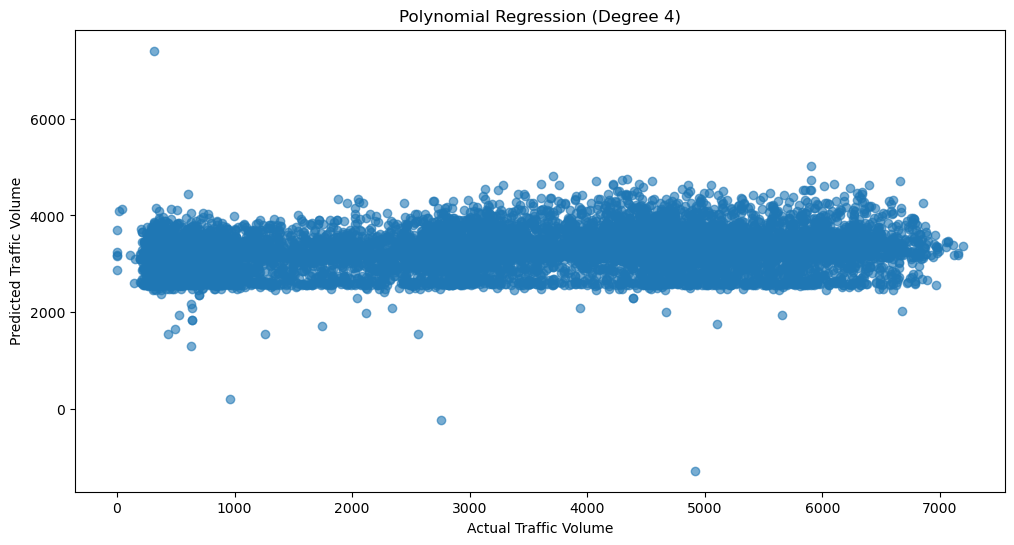

   Degree         RMSE        R²          MAE
0       1  1964.915569  0.023427  1716.926278
1       2  1953.305519  0.034934  1701.868234
2       3  1944.582291  0.043534  1690.045779
3       4  1938.799719  0.049214  1685.112677


In [11]:
# Step 1: Dataset Selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_friedman1  # Optional synthetic dataset

# Load real-world dataset
df = pd.read_csv("assets/Metro_Interstate_Traffic_Volume.csv")

# Display basic dataset info
print(df.head())
print(df.info())

# Step 2: Exploratory Data Analysis (EDA)
# Visualizing relationships
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["temp"], y=df["traffic_volume"])
plt.title("Temperature vs. Traffic Volume")
plt.xlabel("Temperature (°C)")
plt.ylabel("Traffic Volume")
plt.show()

df["date_time"] = pd.to_datetime(df["date_time"])

sns.lineplot(x=df["date_time"].dt.hour, y=df["traffic_volume"])
plt.title("Hour of Day vs. Traffic Volume")
plt.xlabel("Hour of Day")
plt.ylabel("Traffic Volume")
plt.show()

# Step 3: Feature Engineering
# Selecting relevant features and creating polynomial features
features = ["temp", "rain_1h", "clouds_all"]
X = df[features]
y = df["traffic_volume"]

# Polynomial feature transformation (degrees 1-4)
poly_transformations = {}
for degree in range(1, 5):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    poly_transformations[degree] = X_poly

# Feature scaling (optional)
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(poly_transformations[3])  # Using degree 3 for scaling

# Step 4: Model Development
results = []
for degree, X_poly in poly_transformations.items():
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    # Step 5: Model Evaluation
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r_squared = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    results.append((degree, rmse, r_squared, mae))

    # Visualization for each degree
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, predictions, alpha=0.6)
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("Actual Traffic Volume")
    plt.ylabel("Predicted Traffic Volume")
    plt.show()

# Summarizing Results
results_df = pd.DataFrame(results, columns=["Degree", "RMSE", "R²", "MAE"])
print(results_df)



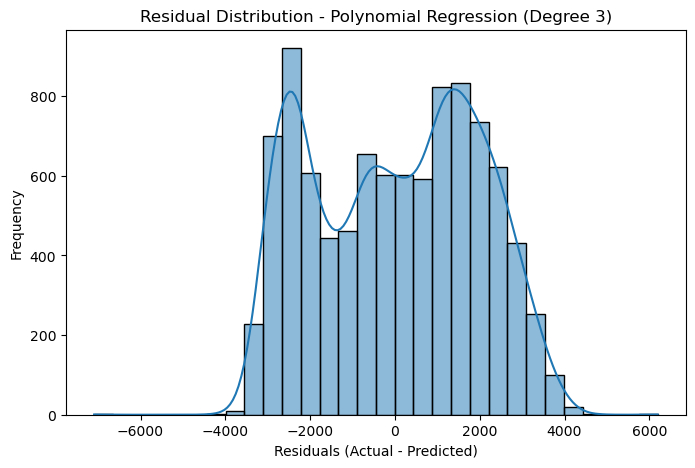

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(y_test - predictions, bins=30, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution - Polynomial Regression (Degree 3)")
plt.show()

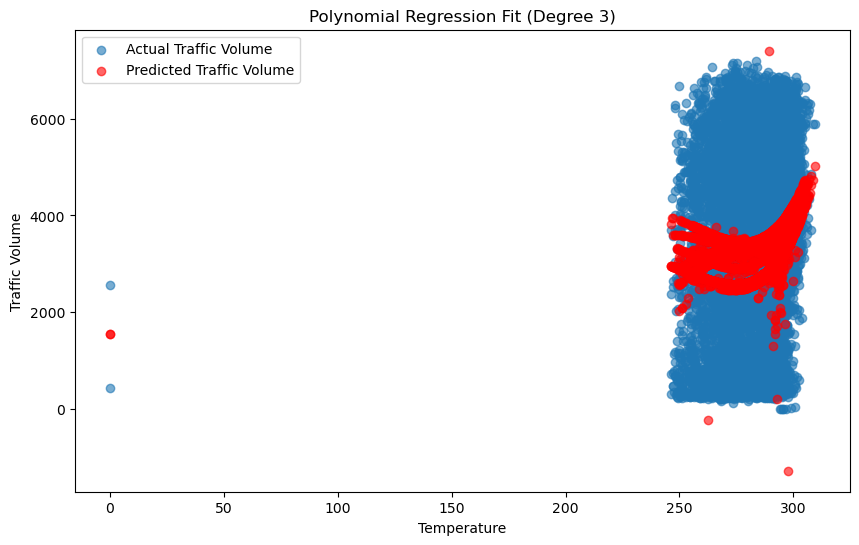

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 1], y_test, alpha=0.6, label="Actual Traffic Volume") 
plt.scatter(X_test[:, 1], predictions, alpha=0.6, color="red", label="Predicted Traffic Volume")
plt.xlabel("Temperature")
plt.ylabel("Traffic Volume")
plt.title("Polynomial Regression Fit (Degree 3)")
plt.legend()
plt.show()